In [19]:
%%bash
cd "/content/drive/MyDrive/Colab Notebooks/EDA Titanic Dataset"

# 1) Remove the existing origin
git remote remove origin

# 2) Re-add it (we’ll do the token embed next)
git remote add origin https://github.com/FletcherMorgan/Titanic-EDA.git

# 3) Confirm
git remote -v


origin	https://github.com/FletcherMorgan/Titanic-EDA.git (fetch)
origin	https://github.com/FletcherMorgan/Titanic-EDA.git (push)


# **A Socio-Economic Exploratory Analysis of Survival on the RMS Titanic**

## 1. Project Overview

Setting sail from Southampton on 10th April 1912, the RMS Titanic and its perilous demise has been so mythologised in popular culture - invoking Hollywood pageantry more than the 1,500 lives lost - that its true human tragedy remains unexplored. This Notebook represents my very first data-science project, within which I perform a comprehensive exploratory data analysis (EDA) of the famous Titanic Dataset. This EDA includes cleaning missing data, visualising univariate distributions, examining bivariate relationships, engineering new features, and benchmarking three unique models. Through this layered analysis, I hope to uncover the hidden patterns, and determine which factors truly shaped survival outcomes.

## 2. Data Cleaning & Preparation

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import Drive

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/EDA Titanic Dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/EDA Titanic Dataset


In [ ]:
df = pd.read_csv("Data/Titanic-Dataset.csv")


In [ ]:
# Identify missing values

missing_count = df.isnull().sum()

missing_pct = (df.isnull().mean() * 100).round(2)

missing = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
})
missing   # Empty values in Age (19.87%), Cabin (77.10%), and Embarked (0.22%)


,missing_count,missing_pct
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [ ]:
# Introduce category of Has_Cabin

df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('Unknown')

df[['Cabin', 'Has_Cabin', 'Deck']].head(10)

# Replace missing ages with median

age_median = df['Age'].median()

df['Age'] = df['Age'].fillna(age_median)

df['Age'].isnull().sum()

# Replace missing mebarkation with mode

embark_mode = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(embark_mode)

df['Embarked'].isnull().sum()

np.int64(0)

In [ ]:
# Check again for missing values

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().mean() * 100).round(2)
})
missing   # Missing values have disappeared, with 'Cabin' being repurposed into 'Has_Cabin'


,missing_count,missing_pct
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


## 3. Univariate Analysis

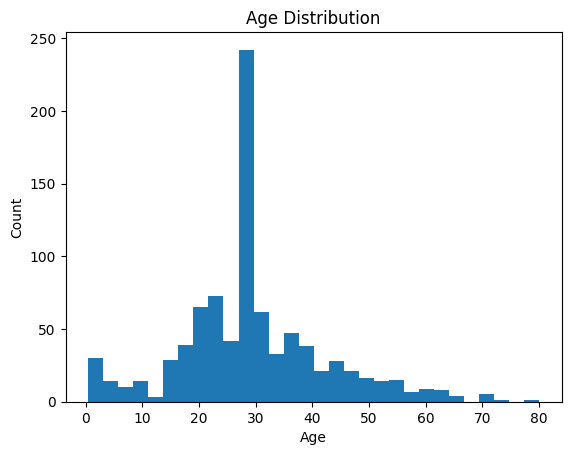

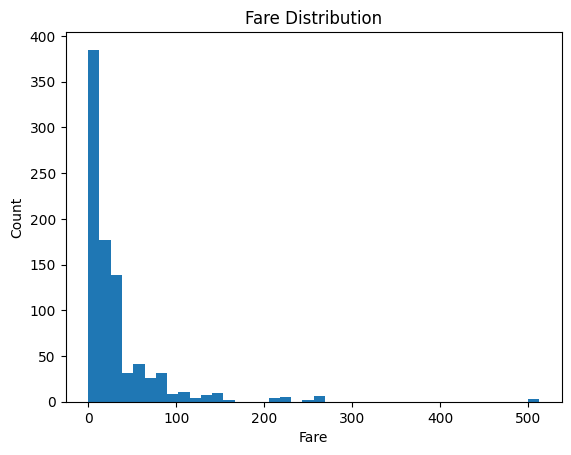

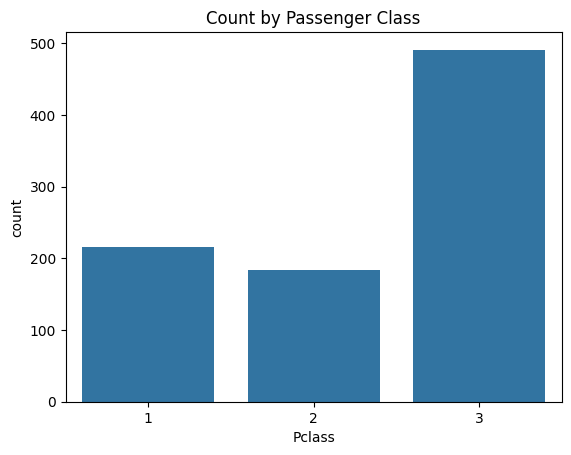

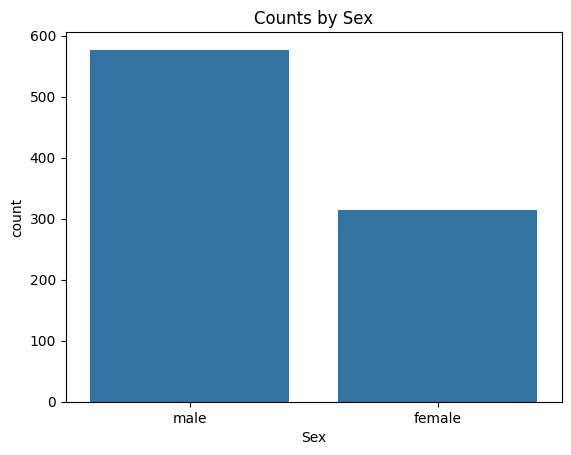

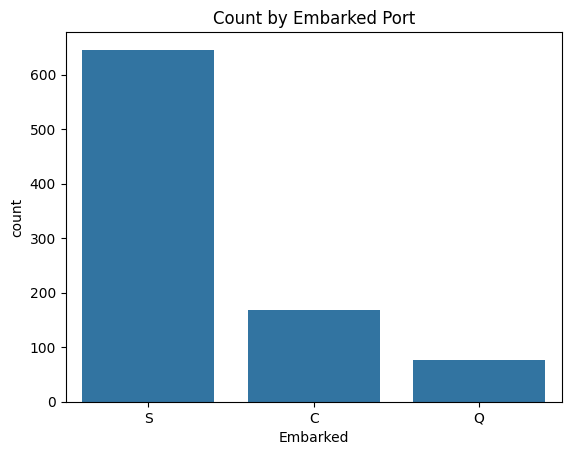

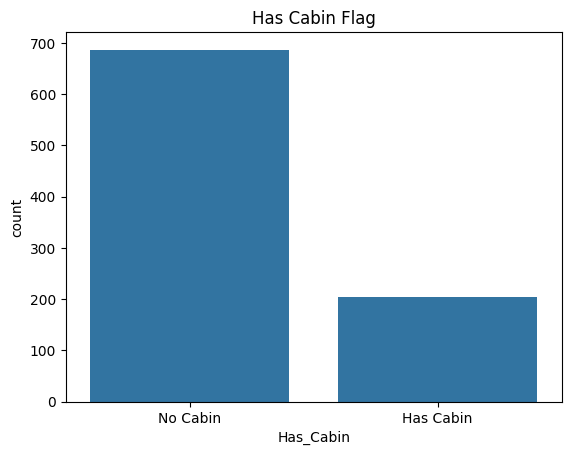

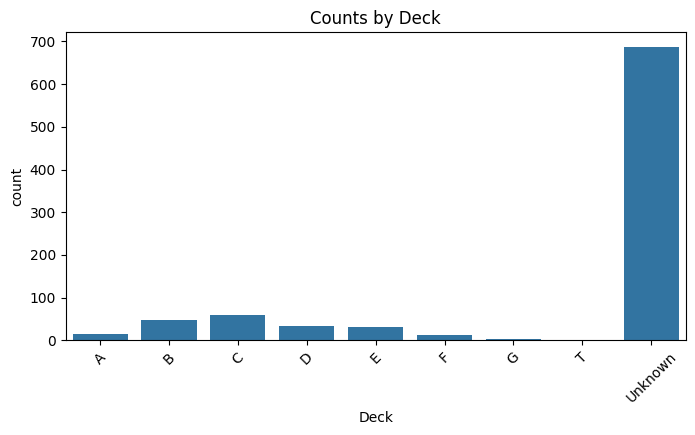

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution

plt.hist(df['Age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()    # Age is right-skewed, with the bulk of passenders under the age of 30

# Fare Distribution

plt.hist(df['Fare'], bins=40)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()    # Fare is heavily tailed, with a particularly high outlier ~£500

# Non-Numeric Variable Distributions

sns.countplot(x='Pclass', data=df)
plt.title('Count by Passenger Class')
plt.show()    # Number of passengers decreases as class increases

sns.countplot(x='Sex', data=df)
plt.title('Counts by Sex')
plt.show()    # Higher count of male passengers

sns.countplot(x='Embarked', data=df)
plt.title('Count by Embarked Port')
plt.show()    # Majority of passengers embarked from Southampton

sns.countplot(x='Has_Cabin', data=df)
plt.title('Has Cabin Flag')
plt.xticks([0, 1], ['No Cabin', 'Has Cabin'])
plt.show()    # Majority of passengers do not have a cabin

plt.figure(figsize=(8,4))
sns.countplot(x='Deck', data=df, order=sorted(df['Deck'].unique()))
plt.xticks(rotation=45)
plt.title('Counts by Deck')
plt.show()

## 4. Bivariate Analysis

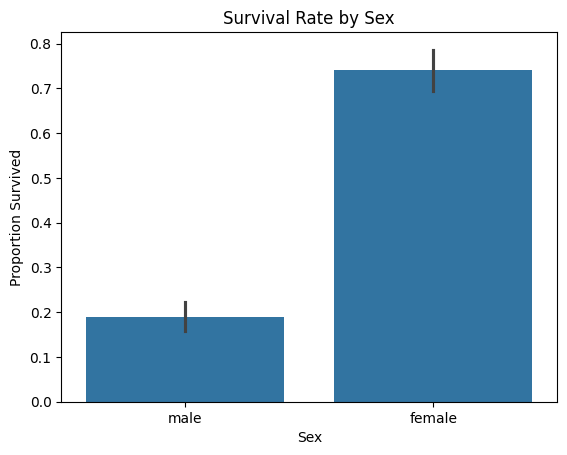

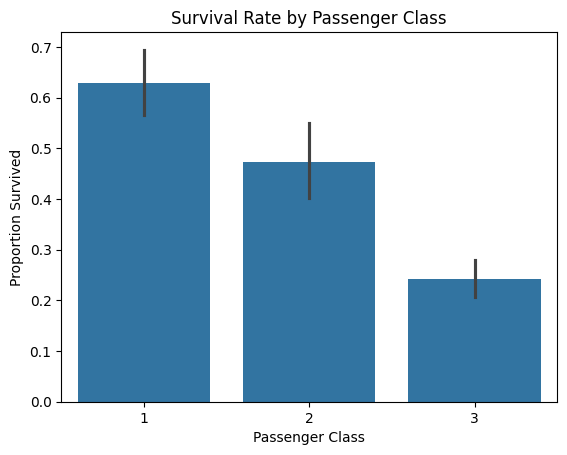

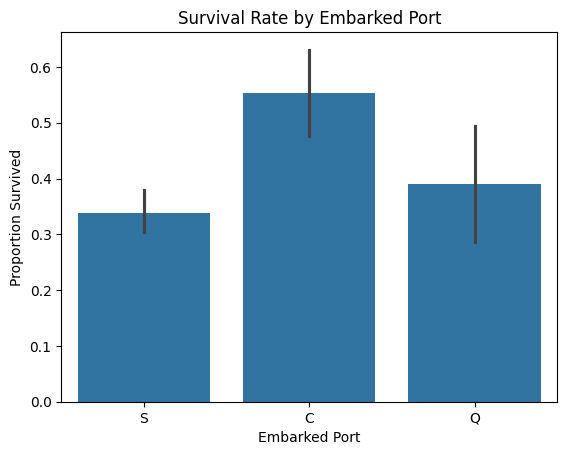

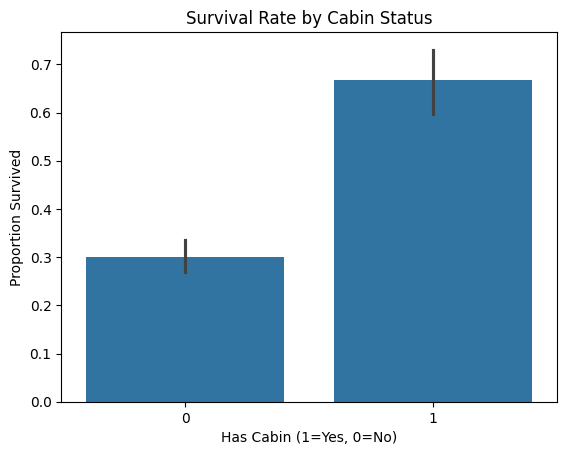

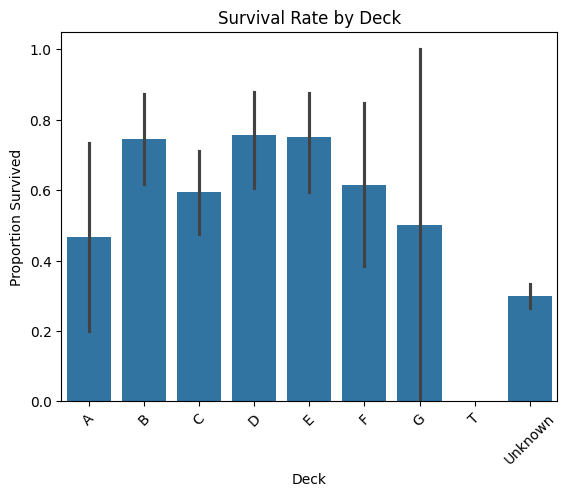

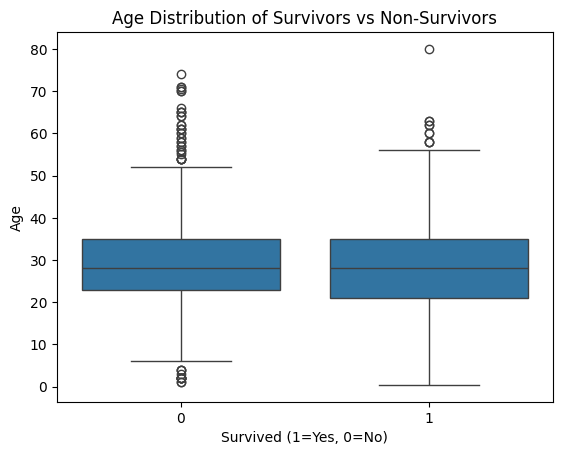

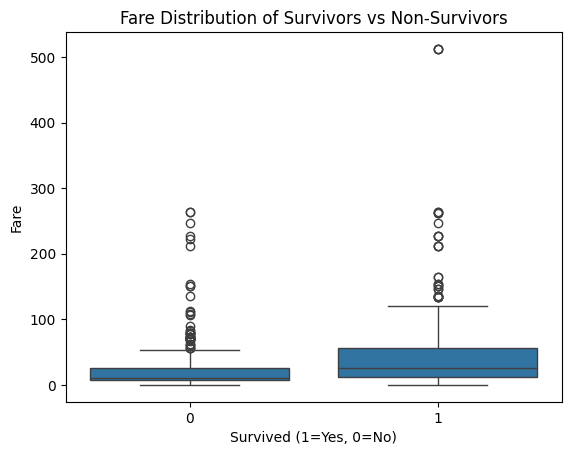

In [ ]:
# Survival Rate by Sex

plt.figure()
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel ('Proportion Survived')
plt.show()    # Female survival rate is ~50% higher than that of males

# Survival Rate by Passenger Class

plt.figure()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel ('Proportion Survived')
plt.show()    # Survival rate increases alongside passenger class

# Survival Rate by Embarked Port

plt.figure()
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel ('Proportion Survived')
plt.show()    # Embarkees from Cherbourg had the highest survival rate, Southampton the lowest

# Survival Rate by Cabin Status

plt.figure()
sns.barplot(x='Has_Cabin', y='Survived', data=df)
plt.title('Survival Rate by Cabin Status')
plt.xlabel('Has Cabin (1=Yes, 0=No)')
plt.ylabel ('Proportion Survived')
plt.show()    # Passengers with a cabin were ~40% more likely to survive

# Survival Rate by Deck

plt.figure()
sns.barplot(x='Deck', y='Survived', data=df,
            order=sorted(df['Deck'].unique()))
plt.title('Survival Rate by Deck')
plt.xticks(rotation=45)
plt.ylabel ('Proportion Survived')
plt.show()    # Varied distribution of survival rate by deck, and a lower survival rate for passengers with unknown decks

# Age Distribution of Survivors vs. Non-Survivors

plt.figure()
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel ('Survived (1=Yes, 0=No)')
plt.ylabel ('Age')
plt.show()    # Larger spread of ages for non-survivors.

# Fare Distribution of Survivors vs. Non-Survivors

plt.figure()
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution of Survivors vs Non-Survivors')
plt.xlabel ('Survived (1=Yes, 0=No)')
plt.ylabel ('Fare')
plt.show()    # Passengers with greater fares were more likely to survive.

## 5. Multivariate & Correlation Analysis

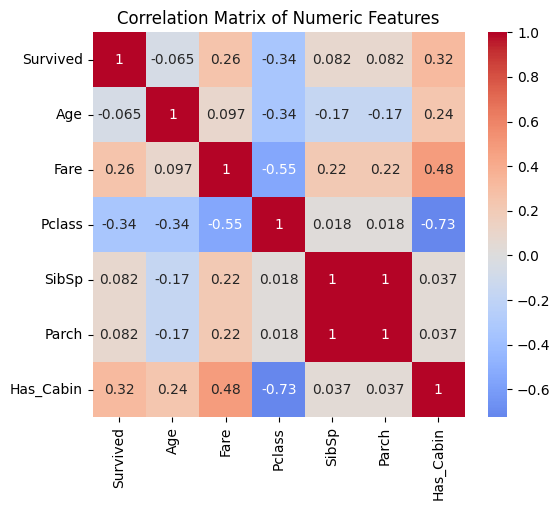

In [ ]:
# Correlation matrix of numeric features

num_cols = ['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Has_Cabin']

corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
# Variables with the highest correlation with surviving are passenger class, cabin status, and fare (which themselves are all highly correlated).

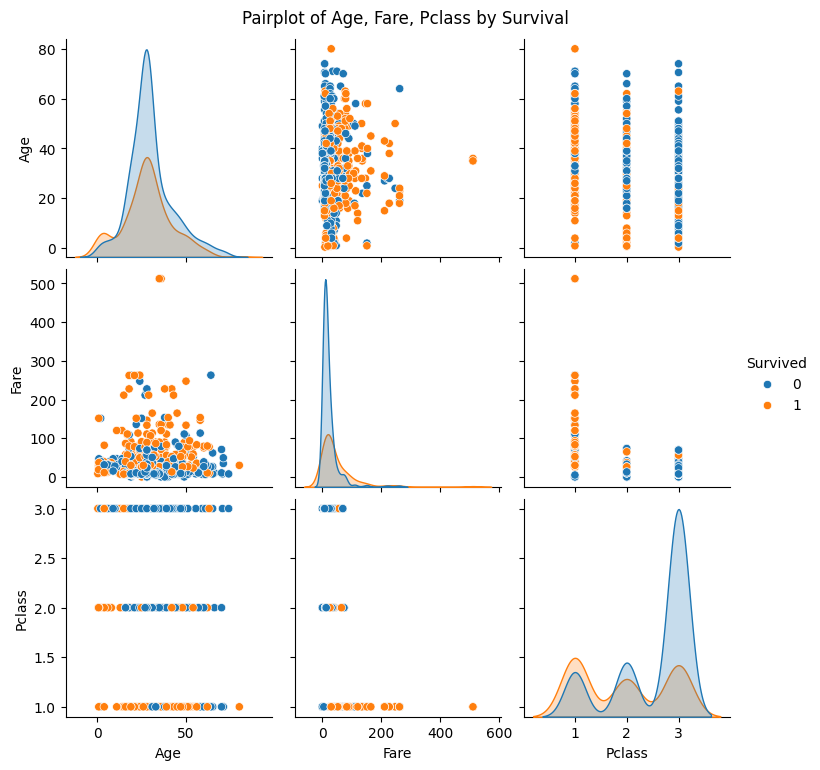

In [ ]:
# Pairwise Scatter / Facet Plot

sns.pairplot(df, vars=['Age', 'Fare', 'Pclass'], hue='Survived',
             palette='tab10', diag_kind='kde')
plt.suptitle('Pairplot of Age, Fare, Pclass by Survival', y=1.02)
plt.show()    # Fare and Passenger Class once more proving valuable indicators for surivial.

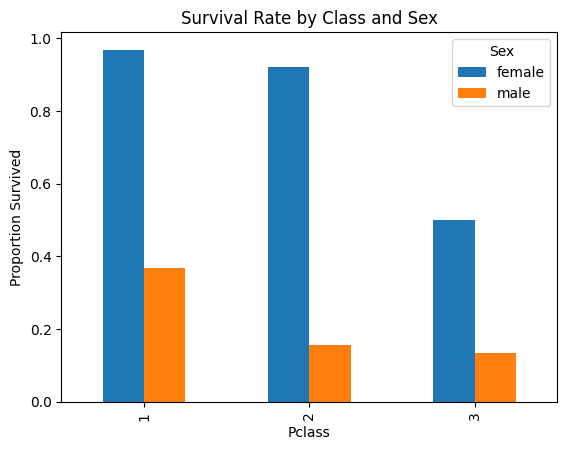

In [ ]:
# Pivot Table: Survival by Class & Sex

pivot = df.pivot_table(
    index='Pclass', columns='Sex',
    values='Survived', aggfunc='mean'
)
pivot

pivot.plot.bar()
plt.ylabel('Proportion Survived')
plt.title('Survival Rate by Class and Sex')
plt.show()    # Women survive at a higher rate across passenger classes, particularly prominently in 2nd class passengers (~400% more)

## 6. Feature Engineering

In [ ]:
df.to_csv('Data/Titanic-Cleaned.csv', index=False)

In [ ]:
df = pd.read_csv('Data/Titanic-Cleaned.csv')

In [ ]:
# Create FamilySize variable (SibSp + Parch + 1)

df['FamilySize'] = df['SibSp'] = df['Parch'] + 1

# Create IsAlone variable (1 if Yes, 0 if No)

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SibSp       891 non-null    int64
 1   Parch       891 non-null    int64
 2   FamilySize  891 non-null    int64
 3   IsAlone     891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


In [ ]:
# Create FarePerPerson variable (Fare / FamilySize)

df['FarePerPerson'] = df['Fare'] / df['FamilySize']

df[['Fare', 'FamilySize', 'FarePerPerson']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fare           891 non-null    float64
 1   FamilySize     891 non-null    int64  
 2   FarePerPerson  891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [ ]:
# Create title variable

df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')

# Distinguish irregular titles as 'Rare'
rare_titles = ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle', 'Mme', 'Ms']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Rare,27


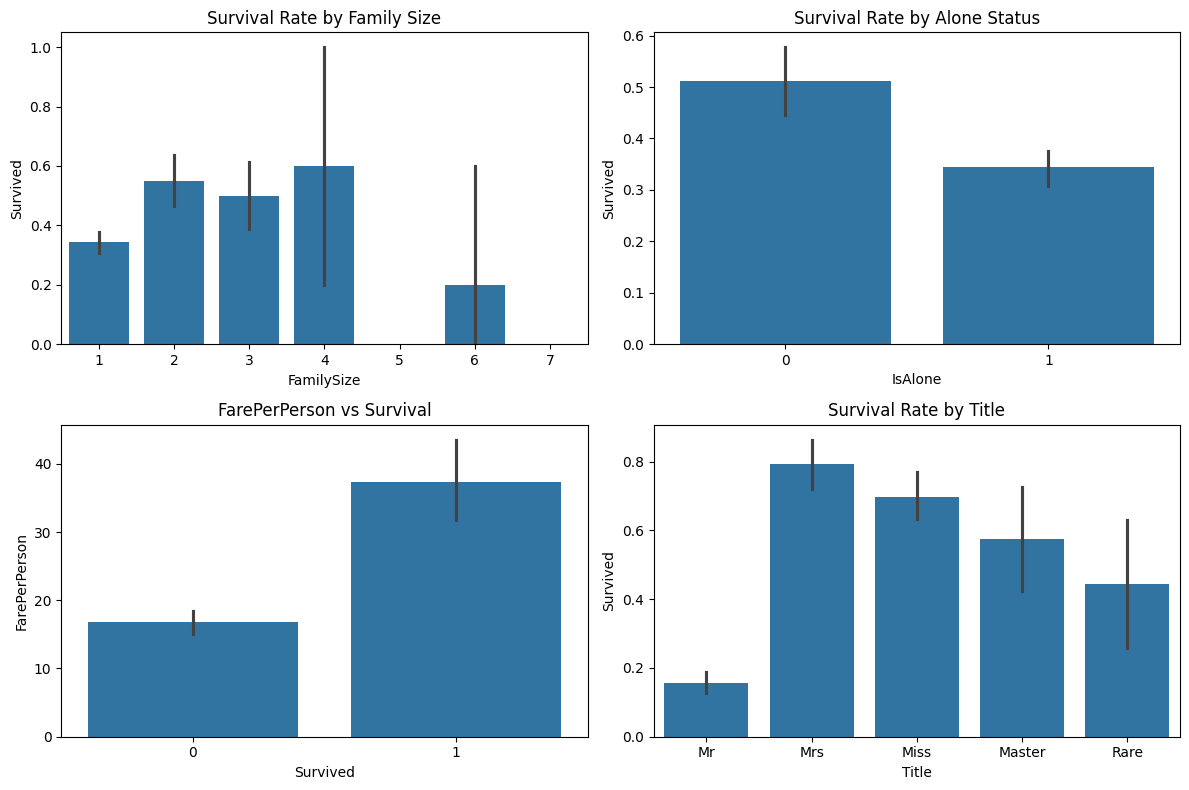

In [ ]:
# Plot survival rates for new variables

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Family Size')   # Those with family sizes of 2, 3, and 4 have the highest likelihood of survival.

sns.barplot(x='IsAlone', y='Survived' , data=df, ax=axes[1])
axes[1].set_title('Survival Rate by Alone Status')    # Passengers are less likely to survive alone

sns.barplot(x='Survived', y='FarePerPerson', data=df, ax=axes[2])
axes[2].set_title('FarePerPerson vs Survival')    # Average fares for survivors were ~£20 higher than those of non-survivors

sns.barplot(x='Title', y='Survived', data=df, ax=axes[3])
axes[3].set_title('Survival Rate by Title')   # Adult men (Mr.) had by far the lowest rate of survival, and females were more likely to survive if married

plt.tight_layout()
plt.show()

## 7. Logistic Regression Testing

In [ ]:
# Load features-enriched dataset

df.to_csv('Data/titanic_features.csv', index=False)

In [ ]:
# Prepare libraries for modelling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

df = pd.read_csv('Data/titanic_features.csv')

In [ ]:
# Define features (X) & target (y)

X = df[['Pclass', 'Sex', 'Age', 'FarePerPerson', 'FamilySize', 'IsAlone', 'Title', 'Has_Cabin']]
y = df['Survived']

In [ ]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Specify categorical & numerical columns

cat_features = ['Sex', 'Title', 'Has_Cabin', 'IsAlone']
num_features = ['Pclass', 'Age', 'FarePerPerson', 'FamilySize']

# Build a preproccessing transformer

preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', 'passthrough', num_features)
])

# Create a modelling pipeline

model = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model

model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Title', 'Has_Cabin',
                                                   'IsAlone']),
                                                 ('num', 'passthrough',
                                                  ['Pclass', 'Age',
                                                   'FarePerPerson',
                                                   'FamilySize'])])),
                ('clf', LogisticRegression(max_iter=1000))])

In [ ]:
# Model makes predictions on test set

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Performance evaluation

print("LR Accuracy:", accuracy_score(y_test, y_pred))
print("LR ROC AUC :", roc_auc_score(y_test, y_proba))

LR Accuracy: 0.8044692737430168
LR ROC AUC : 0.857707509881423


## 8. Random Forest Classifier

In [ ]:
# Import Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# Reintroducing our preprocessor

rf_model = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

In [ ]:
# Train the Random Forest

rf_model.fit(X_train, y_train)

# Model Prediction on the test set

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

# Performance evaluation

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF ROC AUC :", roc_auc_score(y_test, y_proba_rf))

RF Accuracy: 0.7988826815642458
RF ROC AUC : 0.8361660079051383


## 9. Gradient Boosting Classifier

In [ ]:
# Import Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Reintroducing our preprocessor

gb_model = Pipeline([
    ('prep', preprocessor),
    ('clf', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

In [ ]:
# Training the model

gb_model.fit(X_train, y_train)

# Model Prediction on the test set

y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:,1]

# Performance evaluation

print("GB Accuracy:", accuracy_score(y_test, y_pred_gb))
print("GB ROC AUC :", roc_auc_score(y_test, y_proba_gb))

GB Accuracy: 0.7988826815642458
GB ROC AUC : 0.8239789196310936


## 10. Cross-Validation

In [ ]:
# Import cross_val_score

from sklearn.model_selection import cross_val_score

In [ ]:
# Logistic Regression CV

lr_acc_cv = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
lr_auc_cv = cross_val_score(model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

print(f"LR Accuracy CV: {lr_acc_cv.mean():.3f} +/- {lr_acc_cv.std():.3f}")
print(f"LR ROC AUC CV : {lr_auc_cv.mean():.3f} +/- {lr_auc_cv.std():.3f}")

LR Accuracy CV: 0.820 +/- 0.014
LR ROC AUC CV : 0.862 +/- 0.018


In [ ]:
# Random Forest CV

rf_acc_cv = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
rf_auc_cv = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

print(f"RF Accuracy CV: {rf_acc_cv.mean():.3f} +/- {rf_acc_cv.std():.3f}")
print(f"RF ROC AUC CV : {rf_auc_cv.mean():.3f} +/- {rf_auc_cv.std():.3f}")

RF Accuracy CV: 0.815 +/- 0.035
RF ROC AUC CV : 0.864 +/- 0.040


In [ ]:
# Gradient Boosting CV

gb_acc_cv = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
gb_auc_cv = cross_val_score(gb_model, X, y, cv=5, scoring='roc_auc', n_jobs=1)

print(f"GB Accuracy CV: {gb_acc_cv.mean():.3f} +/- {gb_acc_cv.std():.3f}")
print(f"GB ROC AUC CV : {gb_auc_cv.mean():.3f} +/- {gb_auc_cv.std():.3f}")

GB Accuracy CV: 0.835 +/- 0.027
GB ROC AUC CV : 0.869 +/- 0.036


## 10. Key Takeaways

This analysis of the RMS Titanic's sinking confirms that survival was far from random. Instead, it must be seen as a stark reflection of the rigid social hierarchies of the Edwardian era and Gilded Age. The variables with the highest correlation to survival were social class and gender. The chivalry of the passengers is displayed by the survival disparity of females (74.2%) and males (18.9%), and the importance of wealth is confirmed as first-class passengers (63%) were nearly three times more likely to survive than their third-class comrades (24%). This confirms that survival was entirely not relevant, but instead that socio-economic norms of 'women and children first' and the hierarchical Gilded Age society greatly determined one's fate.

The predictive models - Logistic Regression (0.820), Random Forest (0.815), and Gradient Boosting (0.835) - all achieved high accuracy. They also all achieved high ROC AUC scores ranging from 0.862-0.869 and consistently identified the same key features. The engineered feature 'Title' was an impressively strong predictor, expected given that it combines a passenger's gender, age, and social standing. Further, the engineered feature 'FarePerPerson' reinforces the relevance of wealth, showing that even within the same classes, higher-paying passengers had superior odds at surviving. This statistical backing confirms that the patterns we observed within out data analysis were not just correlations, but instead predictable outcomes.

To conclude, the quantitative findings and historical contexts undoubtedly align. Even the physical layout of the ship and critical shortage of lifeboats contributed to a scenario where existing inequalities were heightened. When the crisis erupted, the lack of safety measures reimposed the historically ingrained social order which dictated who was given priority. Therefore, the tragic catastrophe must not be seen only as a failure of the 1910s' frontier technology, but also as a powerful and enduring depiction of social structure determining the fate of crises.